In [1]:
import qiskit
from qiskit import IBMQ
import matplotlib.pyplot as plt
provider = IBMQ.load_account()

In [2]:
from qiskit import execute 
from qiskit import BasicAer
from qiskit import QuantumCircuit, assemble
from qiskit.providers.ibmq import least_busy 
#from qiskit.visualization import plot_histogram

In [3]:
qr = qiskit.QuantumRegister(3)
cr = qiskit.ClassicalRegister(3)
circuit = qiskit.QuantumCircuit(qr, cr) 

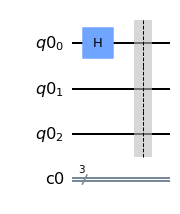

In [4]:
circuit.h(qr[0]) # preparation
circuit.barrier()
circuit.draw(output = 'mpl')

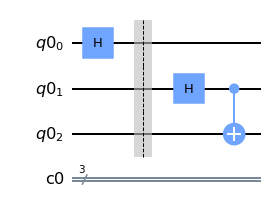

In [5]:
circuit.h(qr[1])
circuit.cx(qr[1],qr[2])
circuit.draw(output = 'mpl')

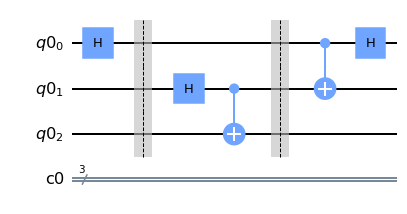

In [6]:
circuit.barrier()
circuit.cx(qr[0],qr[1])
circuit.h(qr[0])
circuit.draw(output = 'mpl')

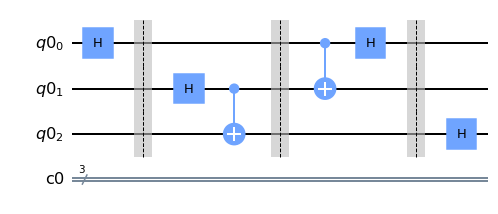

In [7]:
circuit.barrier()
circuit.h(qr[2])
circuit.draw(output = 'mpl')

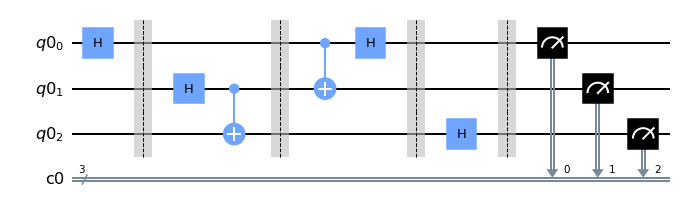

In [8]:
circuit.barrier()
circuit.measure(qr, cr)
circuit.draw(output ='mpl')

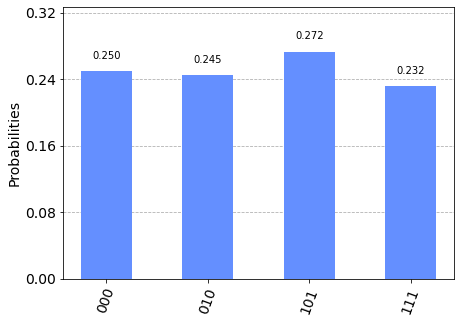

In [9]:
simulator = qiskit.Aer.get_backend('qasm_simulator') 
results = qiskit.execute(circuit, backend=simulator, shots=1024).result()
qiskit.visualization.plot_histogram(results.get_counts(circuit))

In [10]:
n =3
#IBMQ.save_account("7181189011004091f578aaff1bddf3957d0e46284c31bb1c9f758b4dc1afb8b2f28fe4738a4ab96d814ca47ad428f71f7faeb42a7adda2b7f17e1e685b8f9cec", overwrite=True)
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (n+1) and not x.configuration().simulator and x.status().operational == True))
print("least busy backend :", backend)

least busy backend : ibmq_lima


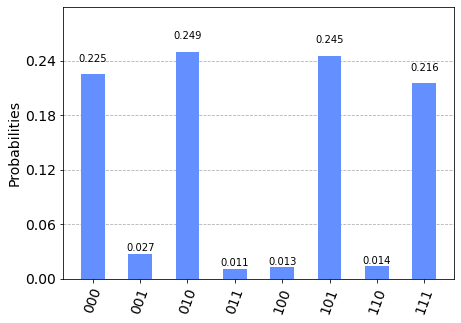

In [11]:
job = qiskit.execute(circuit, backend= backend, shots = 1000, optimization_level = 3)
q_result = job.result()
qiskit.visualization.plot_histogram(q_result.get_counts(circuit))